# Manually verify proper scaling of second-order Laplacian

In [1]:
%matplotlib inline

import glob
import numpy as np
import matplotlib.pyplot as plt

FONTSIZE = 16

filenames = glob.glob('RuntimeF90Test_*_*.dat')
data = np.zeros([len(filenames), 4])
for j, fname in enumerate(filenames):
    data[j, :] = np.loadtxt(fname, delimiter=',')

log_dx  = np.log(data[:-3, 0])
log_err = np.log(data[:-3, 3])
fit = np.polyfit(log_dx, log_err, 1)

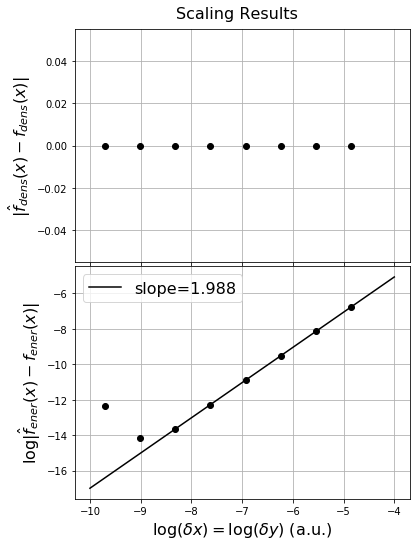

In [2]:
plt.figure(1, figsize=(6, 8))
plt.subplots_adjust(hspace=0.02, top=0.94)
plt.suptitle('Scaling Results', fontsize=FONTSIZE)

x_data = [-10, -4]

subp = plt.subplot(211)
plt.plot(np.log(data[:, 0]), data[:, 2], 'ok')
plt.ylabel(r'$|\hat{f}_{dens}(x) - f_{dens}(x)|$', fontsize=FONTSIZE)
plt.grid(True)
for each in plt.gca().get_xticklabels():
    each.set_visible(False)

plt.subplot(212, sharex=subp)
plt.plot(np.log(data[:, 0]), np.log(data[:, 3]), 'ok')
plt.plot(x_data, np.polyval(fit, x_data), '-k', label='slope={:.3f}'.format(fit[0]))
plt.legend(fontsize=FONTSIZE)
plt.grid(True)
plt.xlabel(r'$\log(\delta x) = \log(\delta y)$ (a.u.)', fontsize=FONTSIZE)
_ = plt.ylabel(r'$\log|\hat{f}_{ener}(x) - f_{ener}(x)|$', fontsize=FONTSIZE)